# Read image and cut into 100 px x 100 px patches

In [2]:
import cv2

In [3]:
from sklearn.feature_extraction import image

In [4]:
img = cv2.imread("shadow_remove.jpg")
img

array([[[ 18,  56,  50],
        [  4,  42,  36],
        [  0,  32,  25],
        ...,
        [ 67, 182, 163],
        [ 34, 150, 143],
        [  8, 127, 126]],

       [[ 56, 100,  93],
        [ 42,  87,  78],
        [ 32,  73,  65],
        ...,
        [ 83, 185, 167],
        [ 53, 156, 149],
        [ 26, 128, 127]],

       [[ 49, 109,  98],
        [ 42, 100,  89],
        [ 39,  92,  82],
        ...,
        [106, 186, 169],
        [ 71, 145, 139],
        [ 27,  99,  99]],

       ...,

       [[156, 233, 205],
        [ 86, 171, 139],
        [ 70, 165, 131],
        ...,
        [ 35,  91,  68],
        [ 43, 100,  75],
        [ 51, 108,  83]],

       [[129, 216, 188],
        [ 78, 169, 136],
        [ 72, 167, 130],
        ...,
        [ 46,  97,  77],
        [ 38,  99,  73],
        [ 33, 100,  71]],

       [[ 30, 122,  93],
        [ 48, 142, 108],
        [ 67, 160, 121],
        ...,
        [ 48,  96,  78],
        [ 17,  82,  56],
        [  0,  72,  42]]

In [5]:
img.shape

(20000, 20000, 3)

In [6]:
# Display image
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
patches = image.extract_patches_2d(img, (100, 100), max_patches= 2000) #img is too large

C:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:287: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  indexing_strides = arr[slices].strides


In [8]:
patches

array([[[[ 40,  75,  55],
         [ 29,  54,  40],
         [ 43,  56,  54],
         ...,
         [ 60, 148, 132],
         [ 38, 127, 111],
         [ 41, 134, 113]],

        [[ 36,  59,  44],
         [ 31,  48,  39],
         [ 75,  85,  85],
         ...,
         [ 50, 131, 116],
         [ 48, 132, 114],
         [ 48, 137, 117]],

        [[ 36,  50,  39],
         [ 31,  40,  37],
         [ 59,  61,  62],
         ...,
         [ 38, 111, 101],
         [ 48, 120, 108],
         [ 49, 124, 108]],

        ...,

        [[ 21,  65,  59],
         [  7,  55,  49],
         [ 44, 103,  89],
         ...,
         [ 28,  37,  24],
         [ 27,  34,  21],
         [ 27,  34,  21]],

        [[ 50, 107, 104],
         [ 55, 106, 102],
         [ 42,  89,  80],
         ...,
         [ 28,  37,  24],
         [ 27,  34,  21],
         [ 27,  34,  21]],

        [[ 61, 121, 115],
         [ 61, 111, 107],
         [ 33,  69,  63],
         ...,
         [ 30,  37,  24],
        

In [9]:
patches.shape

(2000, 100, 100, 3)

In [10]:
patches[0].shape

(100, 100, 3)

Alternatively, get patches by matrix slicing.

# Feed patches into pretrained various deep networks

In [12]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50
 
#Load the VGG model
vgg_model = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
 
#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
 
#Load the ResNet50 model
resnet_model = resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))


C:\Anaconda\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [44]:
from keras.applications import vgg19
vgg_model = vgg19.VGG19(weights='imagenet')

574717952/574710816 [==============================] - 7s 0us/step


In [23]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(patches)

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
 
# # convert the probabilities to class labels
# # We will get top 5 predictions which is the default
# label = decode_predictions(predictions)
# print(label)

In [24]:
predictions

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           3.4622376 ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           4.594317  ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        , 12.111723  , ...,  0.        ,
           0.        ,  5.626127  ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.05270511, 11.910237  ]]],


       [[[ 0.        ,  0.        , 17.897646  , ...,  0

In [19]:
predictions.shape

(2000, 3, 3, 512)

In [21]:
predictions[0].shape

(3, 3, 512)

In [34]:
predictions.flatten()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [31]:
#predictions_np = np.array(predictions)
s = predictions.flatten()
s.shape

(9216000,)

In [38]:
vgg16_feature_list = []
for patch in patches:
    #img_data = image.img_to_array(img)
    img_data = np.expand_dims(patch, axis=0)
    img_data = vgg16.preprocess_input(img_data)

    vgg16_feature = vgg_model.predict(img_data)
    vgg16_feature_np = np.array(vgg16_feature)
    vgg16_feature_list.append(vgg16_feature_np.flatten())

In [41]:
vgg16_feature_list_np = np.array(vgg16_feature_list)

In [42]:
vgg16_feature_list_np

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.05266511, 11.910224  ],
       [ 0.        ,  0.        , 17.89776   , ...,  0.        ,
         0.        ,  4.8005557 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        12.813364  ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  9.363651  ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [43]:
vgg16_feature_list_np.shape

(2000, 4608)

# Clustering

In [17]:
from sklearn.cluster import KMeans

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
kmeans = KMeans(n_clusters=3)

In [54]:
kmeans.fit(vgg16_feature_list_np)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
y_kmeans = kmeans.predict(vgg16_feature_list_np)

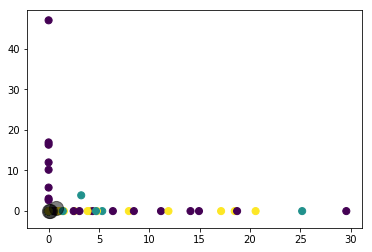

In [56]:
plt.scatter(vgg16_feature_list_np[:, 0], vgg16_feature_list_np[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [54]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(predictions)
#y_kmeans = kmeans.predict()

ValueError: Found array with dim 4. Estimator expected <= 2.

In [18]:
cv2.kmeans(patches, 5)

TypeError: Required argument 'bestLabels' (pos 3) not found

In [57]:
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

80142336/80134624 [==============================] - 1s 0us/step


In [58]:
# prepare the image for the VGG model
processed_image = vgg19.preprocess_input(patches)

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

In [62]:
vgg19_feature_list = []
for patch in patches:
    #img_data = image.img_to_array(img)
    img_data = np.expand_dims(patch, axis=0)
    img_data = vgg19.preprocess_input(img_data)

    vgg19_feature = vgg19_model.predict(img_data)
    vgg19_feature_np = np.array(vgg19_feature)
    vgg19_feature_list.append(vgg19_feature_np.flatten())

vgg19_feature_list_np = np.array(vgg19_feature_list)    

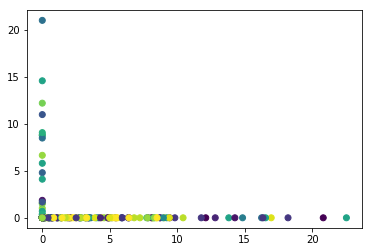

In [64]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(vgg19_feature_list_np)

y_kmeans = kmeans.predict(vgg19_feature_list_np)
plt.scatter(vgg19_feature_list_np[:, 0], vgg19_feature_list_np[:, 1], c=y_kmeans)#, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);